In [1]:
import numpy as np
import teqpflsh
import matplotlib.pyplot as plt

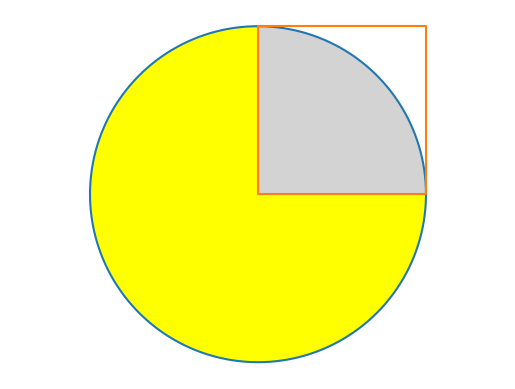

In [2]:
ptr = teqpflsh.GeometryFactoryHolder()

# Polygon for a circle
seq1 = teqpflsh.CoordinateSequence()
t = np.linspace(0, 2*np.pi, 10000)
X = np.cos(t)
Y = np.sin(t)
for i in range(len(t)):
    seq1.add(X[i], Y[i])
seq1.closeRing(True)
poly1 = ptr.createPolygon(seq1)

# Polygon for a square
seq2 = teqpflsh.CoordinateSequence()
x = [0,1,1,0,0]
y = [0,0,1,1,0]
for i in range(len(x)):
    seq2.add(x[i], y[i])
seq2.closeRing(True)
poly2 = ptr.createPolygon(seq2)

def coords2list(coords):
    X, Y = [], []
    for j in range(coords.getSize()):
        X.append(coords.getX(j))
        Y.append(coords.getY(j))
    return X, Y

# Intersection of the circle and the square
Xi, Yi = coords2list(poly1.intersection(poly2).getCoordinates())
    
# Difference of the circle and the square
Xd, Yd = coords2list(poly1.difference(poly2).getCoordinates())
    
plt.plot(X, Y)
plt.plot(x, y)

plt.fill(Xi, Yi, 'lightgrey')
plt.fill(Xd, Yd, 'yellow')
plt.axis('equal')
plt.axis('off');

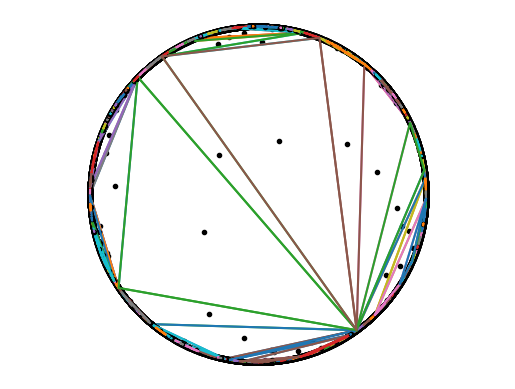

In [8]:
ptr = teqpflsh.GeometryFactoryHolder()

# Polygon for a circle
seq1 = teqpflsh.CoordinateSequence()
t = np.linspace(0, 2*np.pi, 10000)
X = np.cos(t)
Y = np.sin(t)
for i in range(len(t)):
    seq1.add(X[i], Y[i])
seq1.closeRing(True)
poly1 = ptr.createPolygon(seq1)

tri = poly1.DelaunayTriangulate()
Ngeo = tri.getNumGeometries()
for i in range(Ngeo):
    geo = tri.getGeometryN(i)
    X, Y = coords2list(geo.getCoordinates())
    cen = geo.getCentroid()
    x, y = cen.getX(), cen.getY()
    plt.plot(x, y, 'k.')
    plt.plot(X, Y)
del ptr
plt.axis('equal')
plt.axis('off');